# CLASSIFICATION MODEL EVALUATION METRICS

## EVALUATING A MACHINE LEARNING MODEL
Three ways to evaluate Scikit-Learn models:

* Estimaor's built in 'score()' method
* 'scoring' parameter
* Problem-specific metric functions

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#score method

from sklearn.ensemble import RandomForestClassifier

np.random.seed(43)

X = df.drop("target" ,axis =1)
y = df["target"]

X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size =0.2)

clf = RandomForestClassifier()

clf.fit(X_train ,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
clf.score(X_train,y_train)   #highest value for the .score() method is 1.0 and lowest is 0.0

1.0

In [9]:
clf.score(X_test , y_test)

0.8852459016393442

# let's use the score() on our regression problem 

In [11]:
housing = pd.read_csv("housing.csv")
housing
#housing_df = pd.DataFrame(housing["data"], columns= housing["feature_names"])
#housing_df
#housing_df["MadHouseVal"] = housing["target"]
#housing_df.head()
#housing_df["Target"] = housing["target"]
#housing_df
#housing_df = housing_df.drop("MadHouseVal", axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
housing_df = housing

In [13]:
housing_df.rename(columns={"median_house_value": "Target"}, inplace=True)
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(22)

X = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

X = pd.get_dummies(X, columns=["ocean_proximity"])

X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.2)

model = RandomForestRegressor(n_estimators = 50)

model.fit(X_train , y_train)

y_preds = model.predict(X_test)

In [15]:
model.score(X_train ,y_train)

0.9739501946774013

In [16]:
model.score(X_test, y_test)

0.8192718628371627

## Evaluating the model using the scoring parameter 

In [130]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X= df.drop("target",axis =1)
y= df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)
clf.score(X_test,y_test) #accuracy score


0.8524590163934426

In [134]:
cross_val_score(clf,X,y,cv =5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [135]:
np.random.seed(42)

#single training an dtest split score
clf_single_score = clf.score(X_test, y_test)

#mean of 5- fold cross- validation score
clf_cvs = np.mean(cross_val_score(clf,X,y,cv =3))

#compare the two
clf_single_score, clf_cvs

(0.8524590163934426, 0.8316831683168316)

In [138]:
cross_val_score(clf, X,y, cv =5,scoring =None)

array([0.81967213, 0.8852459 , 0.80327869, 0.81666667, 0.78333333])

## when Scoring = None is written, that means cvs is giving scores using default scoring parameters of classifier which is MEAN ACCURACY 

### CLASSIFICATION MODEL EVALUATION METRICS
1. ACCURACY 
2. AREA UNDER ROC CURVE
3. CONFUSION MATRIX
4. CLASSIFICATION REPORT

### Accuracy 

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df.drop("target",axis =1)
y= df["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv =5)

In [144]:
np.mean(cross_val_score)

0.8248087431693989

In [147]:
print(f"Heart Disease Classifier Cross Validated Accuracy: { np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy: 82.48%


## Area under Receiver Operating Characteristic Curve
* Area under curve (AUC)
* ROC curve
  ROC curves are a comparison of a model's true positive rate (tpr) verses a models false positive rate (fpr)
* True Positive : model predicts 1 when truth is 1
* False Positive : model predicts 1 when truth is 0
* True Negative : model predicts 0 when truth is 0
* False Negative : model predicts 0 when truth is 1

In [150]:
# create X_test...
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.2)

In [152]:
from sklearn.metrics import roc_curve


# fit the classifier
clf.fit( X_train, y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] , len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [154]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [156]:
# calculating fpr , trp and thresholds
fpr, tpr , thresholds = roc_curve(y_test, y_probs_positive)
#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

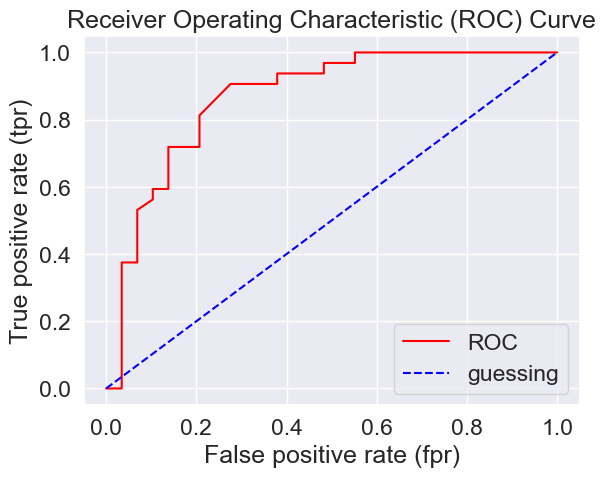

In [158]:
# creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots the ROC curve given the false positive rate (fpr) and  true positive (tpr) of a model
    """

    #plot roc curve
    plt.plot(fpr,tpr, color = "red" , label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color= "blue" , linestyle= "--" ,label ="guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [160]:
from sklearn.metrics import roc_auc_score
# area under curve
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

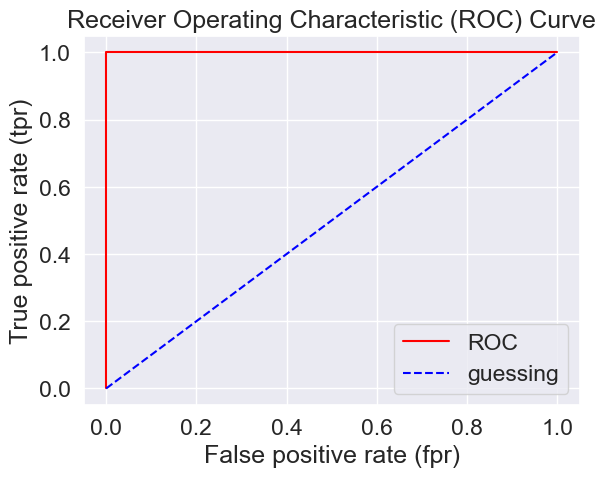

In [162]:
# plot perfect ROC curve and AUC score
fpr, tpr,thresholds = roc_curve(y_test , y_test)
plot_roc_curve(fpr,tpr)

In [164]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0

## Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence , giving you an idea of where the model is getting confused.

In [167]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict( X_test)

confusion_matrix(y_test , y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [169]:
# Visualizing confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted LAbels"])

Predicted LAbels,0,1
Actual Labels,,
0,23,6
1,6,26


In [171]:
24 + 5 + 8 +24

61

In [173]:
!pip install seaborn

<Axes: >

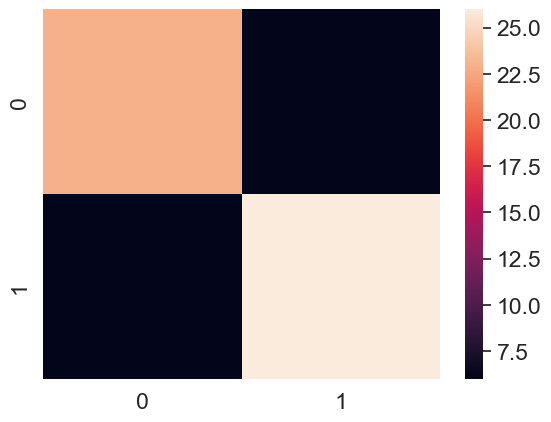

In [174]:
#make our confusion matrix more visual with seaborn heatmap
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test , y_preds)

#plotting it using Seaborn
sns.heatmap(conf_mat)

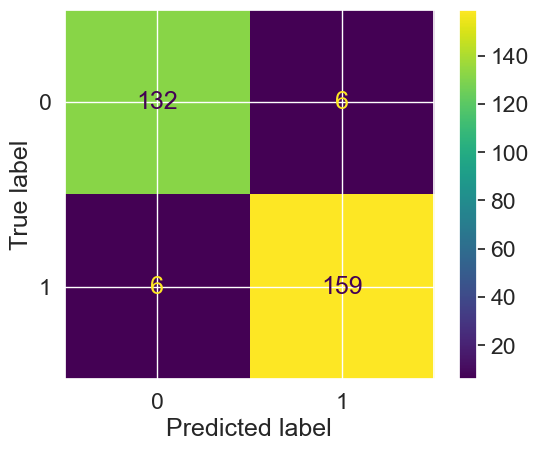

In [175]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

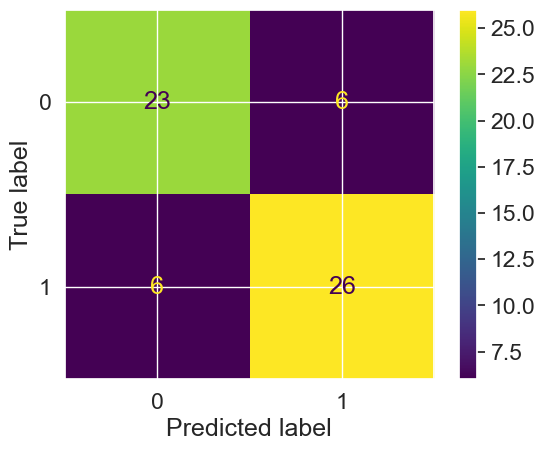

In [176]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test , y_pred = y_preds);

##  Claassification Report

In [182]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [184]:
# where precision and recall become valuable (when we have massive class imbalance)
# lets say there are 10000 people and only one of them have a disease
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case
disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))


C:\Users\daksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\daksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\daksh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# REGRESSION MODEL EVALUATION METRICS
## DOCUMENTATION: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## 
* R^2
* MEAN ABSOLUTE ERROR (MAE)
* MEAN SQUARED ERROR (MSE)


# R2 ERROR

In [195]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("Target",axis =1)
y = housing_df["Target"]

X = pd.get_dummies(X, columns=["ocean_proximity"]) 

X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size =0.2)

model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train ,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [196]:
model.score(X_test,y_test)

0.8174005120588793

In [197]:
from sklearn.metrics import r2_score

# Fill an array with y_test meang
y_test_mean = np.full(len(y_test), y_test.mean())

In [198]:
y_test_mean[:10]

array([205500.30959302, 205500.30959302, 205500.30959302, 205500.30959302,
       205500.30959302, 205500.30959302, 205500.30959302, 205500.30959302,
       205500.30959302, 205500.30959302])

In [199]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

In [200]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

# MEAN ABSOLUTE ERROR (MAE)
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong ur predictions are.

In [202]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae


31586.28148982558

In [203]:
df2 = pd.DataFrame(data ={"actual values" : y_test,
                          "predicted values" : y_preds})

In [204]:
df2["differences"] = df2 ["predicted values"] - df2["actual values"]
df2.head(10)

,actual values,predicted values,differences
20046,47700.0,50876.00,3176.00
3024,45800.0,70185.00,24385.00
15663,500001.0,470982.41,-29018.59
20484,218600.0,256458.01,37858.01
9814,278000.0,260226.00,-17774.00
13311,158700.0,164100.00,5400.00
7113,198200.0,228975.01,30775.01
7668,157500.0,165791.00,8291.00
18246,340000.0,288626.05,-51373.95
5723,446600.0,478789.74,32189.74


In [205]:
df2["differences"].mean()

778.7551962209315

In [206]:
#MAE using formulas and differences
np.abs(df2["differences"]).mean()

31586.28148982558

# MEAN SQUARED ERROR (MSE)
MSE is the mean of the square of the errors between actual and predicted values.

In [208]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse


2392800084.202355

In [209]:
df2["squared_differences"] = np.square(df2["differences"])
df2.head()

,actual values,predicted values,differences,squared_differences
20046,47700.0,50876.00,3176.00,1.008698e+07
3024,45800.0,70185.00,24385.00,5.946282e+08
15663,500001.0,470982.41,-29018.59,8.420786e+08
20484,218600.0,256458.01,37858.01,1.433229e+09
9814,278000.0,260226.00,-17774.00,3.159151e+08


In [210]:
# calculating mse by hand
squared = np.square(df2["differences"])
squared.mean()

2392800084.202355

In [211]:
df2.iloc[0]

actual values             47700.0
predicted values          50876.0
differences                3176.0
squared_differences    10086976.0
Name: 20046, dtype: float64

In [212]:
df_large_error = df2.copy()
df_large_error.iloc[0]["squared_differences"] =16

C:\Users\daksh\AppData\Local\Temp\ipykernel_14684\3332500090.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] =16


In [213]:
df_large_error

,actual values,predicted values,differences,squared_differences
20046,47700.0,50876.00,3176.00,1.600000e+01
3024,45800.0,70185.00,24385.00,5.946282e+08
15663,500001.0,470982.41,-29018.59,8.420786e+08
20484,218600.0,256458.01,37858.01,1.433229e+09
9814,278000.0,260226.00,-17774.00,3.159151e+08
...,...,...,...,...
15362,263300.0,211972.00,-51328.00,2.634564e+09
16623,266800.0,230326.00,-36474.00,1.330353e+09
18086,500001.0,499391.99,-609.01,3.708932e+05
2144,72300.0,69428.00,-2872.00,8.248384e+06


In [214]:
# calculating MSE with large error
df_large_error["squared_differences"].mean()


2392797640.6558433

In [221]:
# it didnt show much difference so we are changing more errors
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,47700.0,50876.00,3176.00,1.600000e+01
3024,20.0,20.00,20.00,2.000000e+01
15663,20.0,20.00,20.00,2.000000e+01
20484,20.0,20.00,20.00,2.000000e+01
9814,20.0,20.00,20.00,2.000000e+01
...,...,...,...,...
15362,263300.0,211972.00,-51328.00,2.634564e+09
16623,266800.0,230326.00,-36474.00,1.330353e+09
18086,500001.0,499391.99,-609.01,3.708932e+05
2144,72300.0,69428.00,-2872.00,8.248384e+06


In [227]:
df_large_error["squared_differences"].mean()

2352332021.49918

## Scoring parameter

In [241]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = df.drop("target" ,axis =1)
y = df["target"]

clf = RandomForestClassifier(n_estimators =100)